<a href="https://colab.research.google.com/github/clionelove123/temp_test/blob/main/Chap_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
# AutoEncoder를 이용한 MNIST Reconstruction

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MNIST 데이터를 다운로드 합니다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 이미지들을 float32 데이터 타입으로 변경합니다.
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
# 28*28 형태의 이미지를 784차원으로 flattening 합니다.
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
# [0, 255] 사이의 값을 [0, 1]사이의 값으로 Normalize합니다.
x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 학습에 필요한 설정값들을 정의합니다.
learning_rate = 0.05
training_epochs = 500    # 반복횟수
batch_size = 64        # 배치개수
display_step = 50        # 손실함수 출력 주기
examples_to_show = 10   # 보여줄 MNIST Reconstruction 이미지 개수
input_size = 784        # 28*28
hidden1_size = 256 
hidden2_size = 128

In [4]:
# tf.data API를 이용해서 데이터를 섞고 batch 형태로 가져옵니다.
train_data = tf.data.Dataset.from_tensor_slices(x_train)
train_data = train_data.shuffle(60000).batch(batch_size)

In [5]:
# Autoencoder 모델을 정의합니다.
class AutoEncoder(object):
  # Autoencoder 모델을 위한 tf.Variable들을 정의합니다.
  def __init__(self):
    # 인코딩(Encoding) - 784 -> 256 -> 128
    self.W1 = tf.Variable(tf.random.normal(shape=[input_size, hidden1_size]))
    self.b1 = tf.Variable(tf.random.normal(shape=[hidden1_size]))
    self.W2 = tf.Variable(tf.random.normal(shape=[hidden1_size, hidden2_size]))
    self.b2 = tf.Variable(tf.random.normal(shape=[hidden2_size]))
    # 디코딩(Decoding) 128 -> 256 -> 784
    self.W3 = tf.Variable(tf.random.normal(shape=[hidden2_size, hidden1_size]))
    self.b3 = tf.Variable(tf.random.normal(shape=[hidden1_size]))
    self.W4 = tf.Variable(tf.random.normal(shape=[hidden1_size, input_size]))
    self.b4 = tf.Variable(tf.random.normal(shape=[input_size]))

  def __call__(self, x):
    H1_output = tf.nn.sigmoid(tf.matmul(x, self.W1) + self.b1)
    H2_output = tf.nn.sigmoid(tf.matmul(H1_output, self.W2) + self.b2)
    H3_output = tf.nn.sigmoid(tf.matmul(H2_output, self.W3) + self.b3)
    reconstructed_x = tf.nn.sigmoid(tf.matmul(H3_output, self.W4) + self.b4)

    return reconstructed_x

In [6]:
# MSE 손실 함수를 정의합니다.
@tf.function
def mse_loss(y_pred, y_true):
  return tf.reduce_mean(tf.pow(y_true - y_pred, 2)) # MSE(Mean of Squared Error) 손실함수

# 최적화를 위한 RMSProp 옵티마이저를 정의합니다.
optimizer = tf.optimizers.RMSprop(learning_rate)

# 최적화를 위한 function을 정의합니다.
@tf.function
def train_step(model, x):
  # 타겟데이터는 인풋데이터와 같습니다.
  y_true = x
  with tf.GradientTape() as tape:
    y_pred = model(x)
    loss = mse_loss(y_pred, y_true)
  gradients = tape.gradient(loss, vars(model).values())
  optimizer.apply_gradients(zip(gradients, vars(model).values()))

반복(Epoch): 1, 손실 함수(Loss): 0.158737
반복(Epoch): 2, 손실 함수(Loss): 0.154233
반복(Epoch): 3, 손실 함수(Loss): 0.132949
반복(Epoch): 4, 손실 함수(Loss): 0.135684
반복(Epoch): 5, 손실 함수(Loss): 0.129512
반복(Epoch): 6, 손실 함수(Loss): 0.124149
반복(Epoch): 7, 손실 함수(Loss): 0.116672
반복(Epoch): 8, 손실 함수(Loss): 0.111461
반복(Epoch): 9, 손실 함수(Loss): 0.109034
반복(Epoch): 10, 손실 함수(Loss): 0.110775
반복(Epoch): 11, 손실 함수(Loss): 0.104013
반복(Epoch): 12, 손실 함수(Loss): 0.101657
반복(Epoch): 13, 손실 함수(Loss): 0.096347
반복(Epoch): 14, 손실 함수(Loss): 0.099706
반복(Epoch): 15, 손실 함수(Loss): 0.094327
반복(Epoch): 16, 손실 함수(Loss): 0.091521
반복(Epoch): 17, 손실 함수(Loss): 0.091547
반복(Epoch): 18, 손실 함수(Loss): 0.090359
반복(Epoch): 19, 손실 함수(Loss): 0.092804
반복(Epoch): 20, 손실 함수(Loss): 0.096351
반복(Epoch): 21, 손실 함수(Loss): 0.090667
반복(Epoch): 22, 손실 함수(Loss): 0.095793
반복(Epoch): 23, 손실 함수(Loss): 0.090902
반복(Epoch): 24, 손실 함수(Loss): 0.091002
반복(Epoch): 25, 손실 함수(Loss): 0.092856
반복(Epoch): 26, 손실 함수(Loss): 0.090041
반복(Epoch): 27, 손실 함수(Loss): 0.091524
반복(Epoch):

<ipython-input-7-a46493831352>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, a = plt.subplots(2, 10, figsize=(10, 2))


반복(Epoch): 51, 손실 함수(Loss): 0.074114
반복(Epoch): 52, 손실 함수(Loss): 0.072873
반복(Epoch): 53, 손실 함수(Loss): 0.072427
반복(Epoch): 54, 손실 함수(Loss): 0.071031
반복(Epoch): 55, 손실 함수(Loss): 0.072818
반복(Epoch): 56, 손실 함수(Loss): 0.077681
반복(Epoch): 57, 손실 함수(Loss): 0.069310
반복(Epoch): 58, 손실 함수(Loss): 0.075494
반복(Epoch): 59, 손실 함수(Loss): 0.071658
반복(Epoch): 60, 손실 함수(Loss): 0.070500
반복(Epoch): 61, 손실 함수(Loss): 0.071760
반복(Epoch): 62, 손실 함수(Loss): 0.075342
반복(Epoch): 63, 손실 함수(Loss): 0.070929
반복(Epoch): 64, 손실 함수(Loss): 0.068875
반복(Epoch): 65, 손실 함수(Loss): 0.075857
반복(Epoch): 66, 손실 함수(Loss): 0.069656
반복(Epoch): 67, 손실 함수(Loss): 0.070467
반복(Epoch): 68, 손실 함수(Loss): 0.066243
반복(Epoch): 69, 손실 함수(Loss): 0.069387
반복(Epoch): 70, 손실 함수(Loss): 0.069078
반복(Epoch): 71, 손실 함수(Loss): 0.071379
반복(Epoch): 72, 손실 함수(Loss): 0.071016
반복(Epoch): 73, 손실 함수(Loss): 0.065583
반복(Epoch): 74, 손실 함수(Loss): 0.067014
반복(Epoch): 75, 손실 함수(Loss): 0.065111
반복(Epoch): 76, 손실 함수(Loss): 0.069764
반복(Epoch): 77, 손실 함수(Loss): 0.071444
반

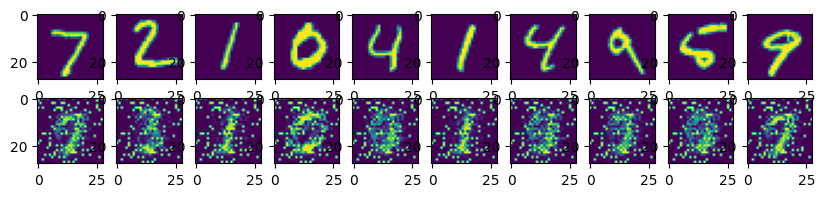

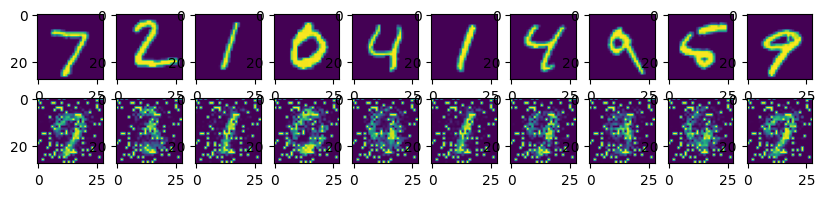

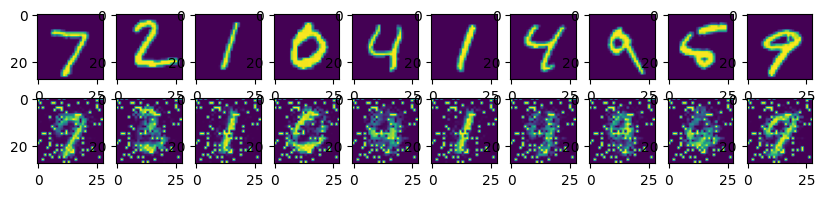

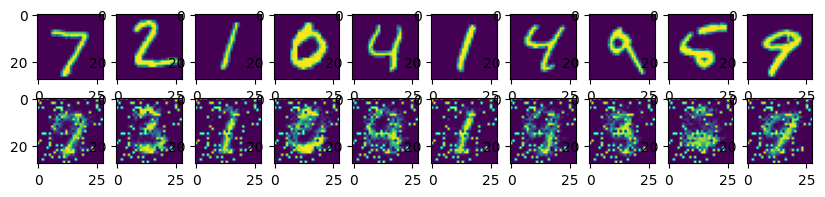

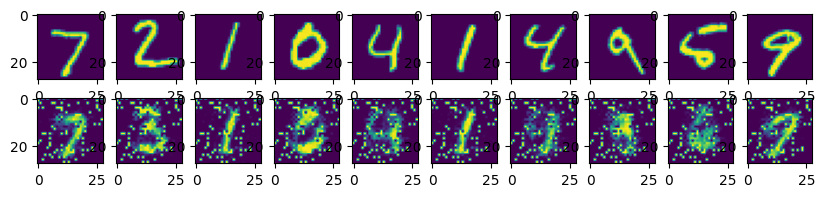

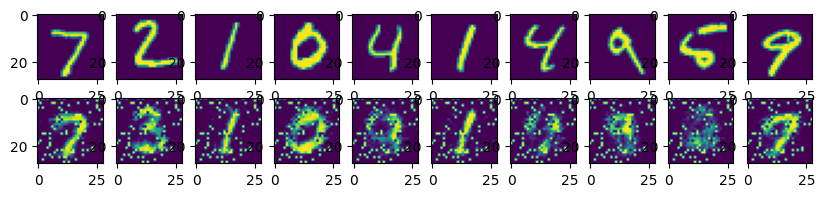

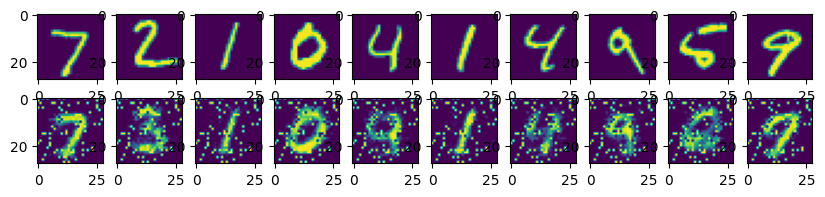

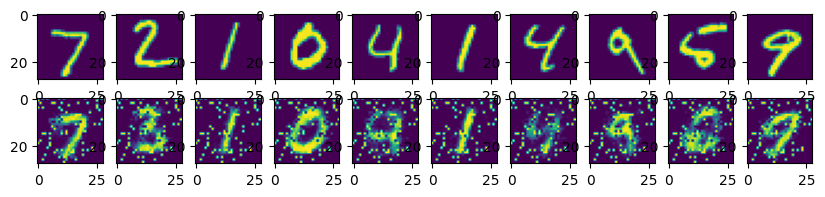

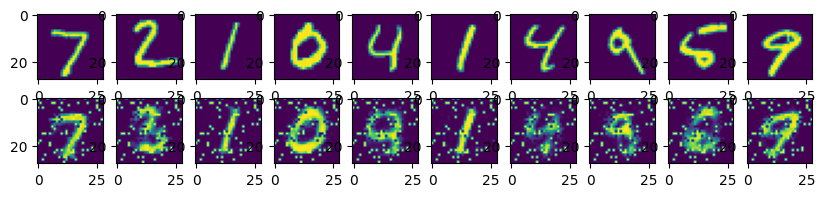

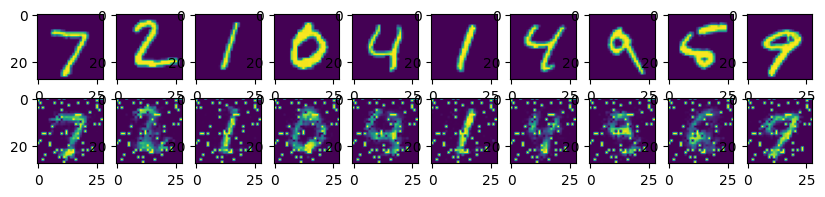

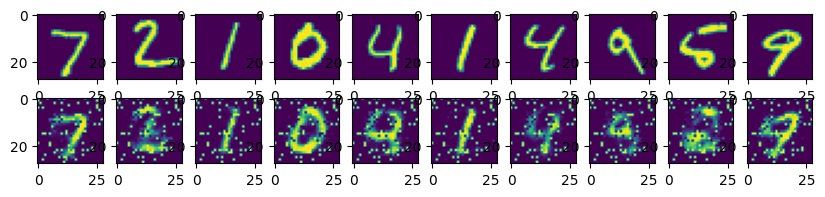

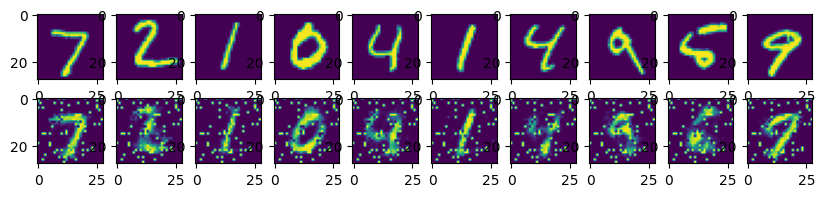

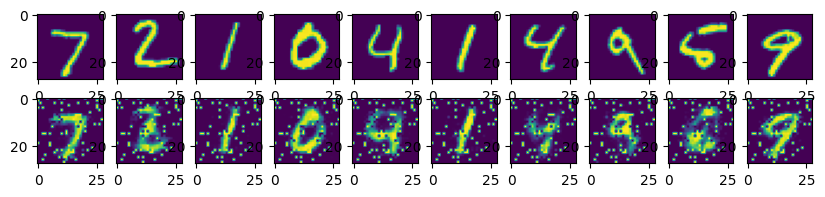

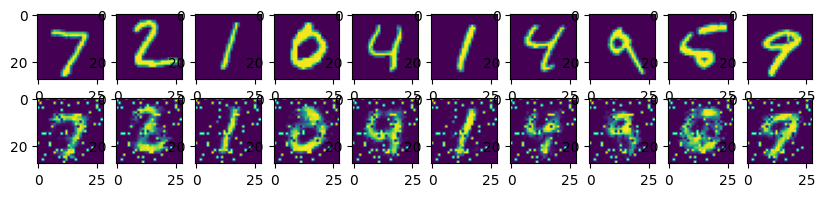

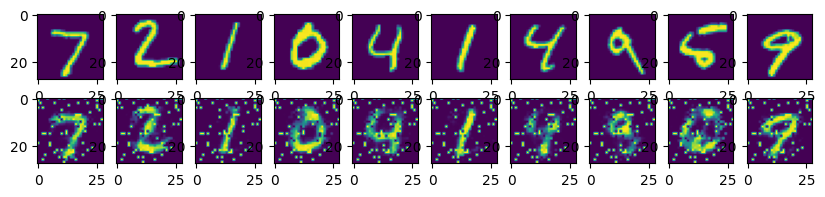

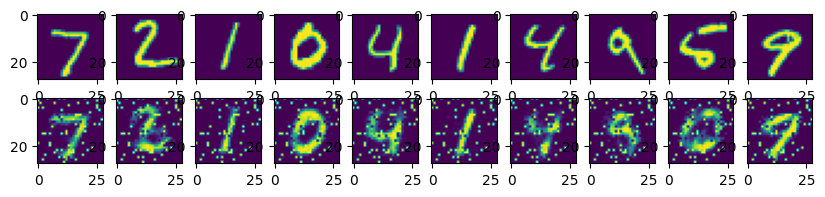

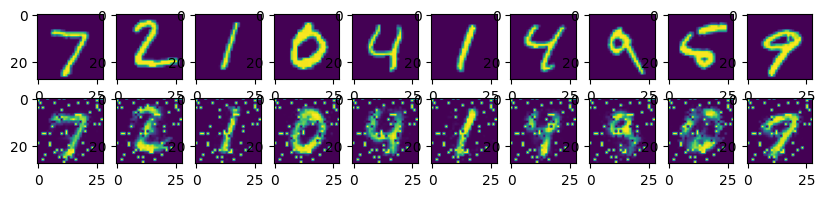

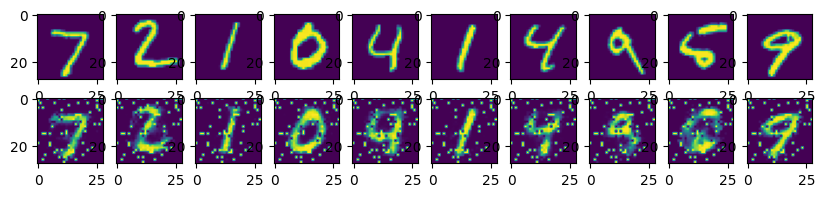

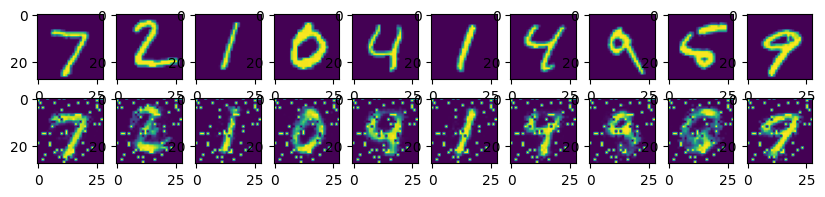

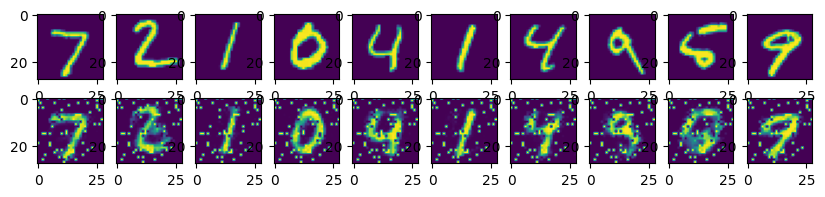

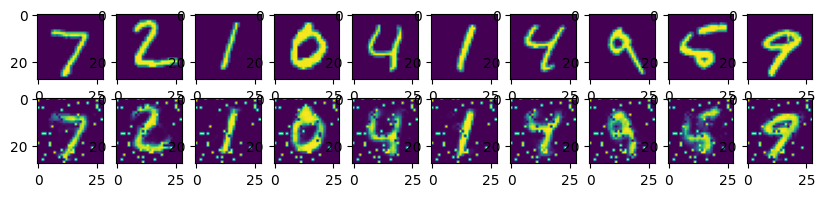

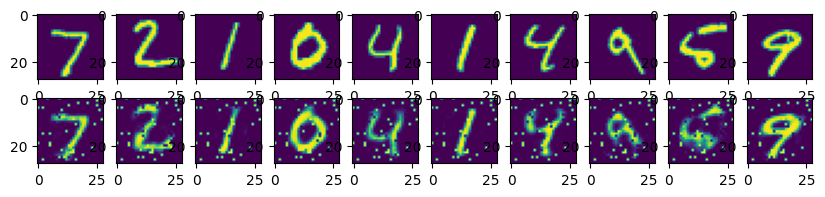

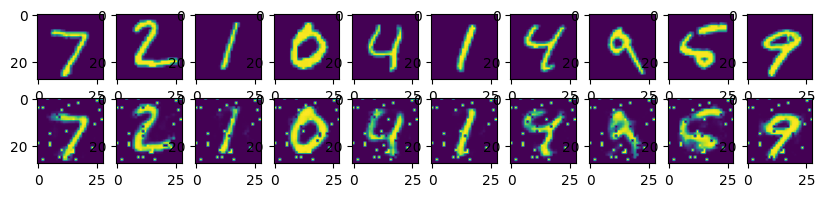

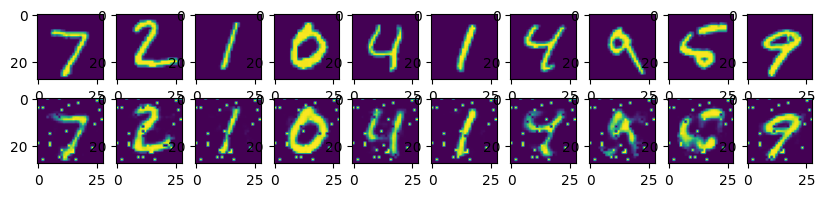

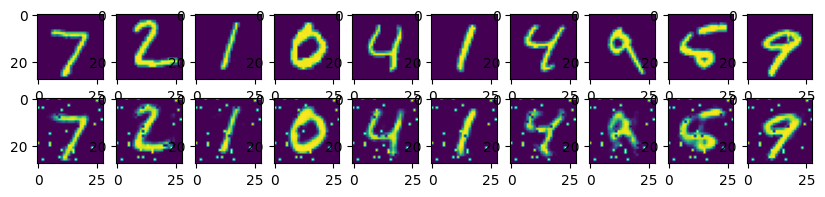

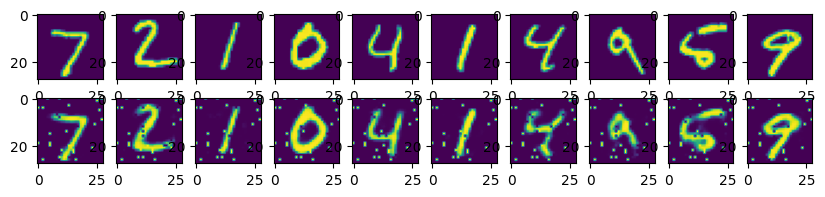

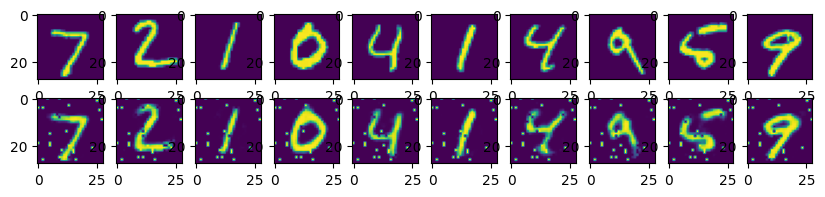

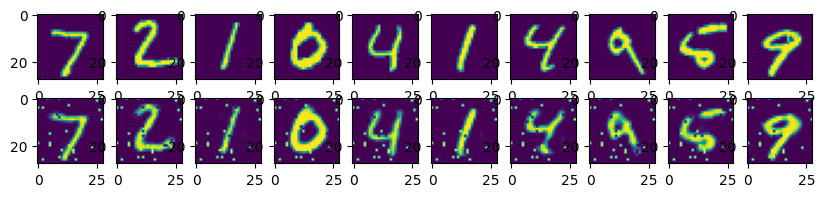

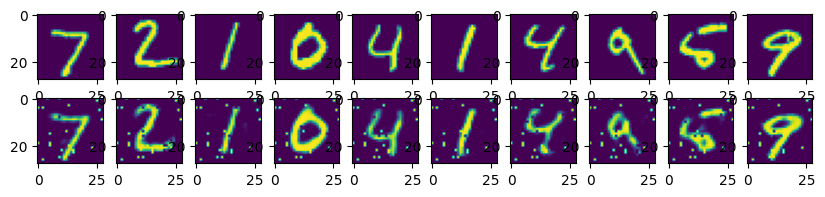

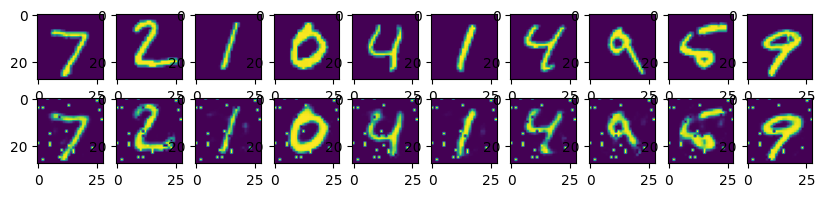

In [7]:
# Autoencoder 모델을 선언합니다.
AutoEncoder_model = AutoEncoder()

# 지정된 횟수만큼 최적화를 수행합니다.
for epoch in range(training_epochs):
  # 모든 배치들에 대해서 최적화를 수행합니다.
  # Autoencoder는 Unsupervised Learning이므로 타겟 레이블(label) y가 필요하지 않습니다.
  for batch_x in train_data:
    # 옵티마이저를 실행해서 파라마터들을 업데이트합니다.
    _, current_loss = train_step(AutoEncoder_model, batch_x), mse_loss(AutoEncoder_model(batch_x), batch_x)
  # 지정된 epoch마다 학습결과를 출력합니다.
  if epoch < 20:
    print("반복(Epoch): %d, 손실 함수(Loss): %f" % ((epoch+1), current_loss))
    # 테스트 데이터로 Reconstruction을 수행합니다.
    reconstructed_result = AutoEncoder_model(x_test[:examples_to_show])
    # 원본 MNIST 데이터와 Reconstruction 결과를 비교합니다.
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
      a[0][i].imshow(np.reshape(x_test[i], (28, 28)))
      a[1][i].imshow(np.reshape(reconstructed_result[i], (28, 28)))
#      f.savefig('reconstructed_mnist_image.png')  # reconstruction 결과를 png로 저장합니다.
    f.show()
    plt.draw()
  elif epoch % display_step == display_step-1:
    print("반복(Epoch): %d, 손실 함수(Loss): %f" % ((epoch+1), current_loss))
    # 테스트 데이터로 Reconstruction을 수행합니다.
    reconstructed_result = AutoEncoder_model(x_test[:examples_to_show])
    # 원본 MNIST 데이터와 Reconstruction 결과를 비교합니다.
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
      a[0][i].imshow(np.reshape(x_test[i], (28, 28)))
      a[1][i].imshow(np.reshape(reconstructed_result[i], (28, 28)))
#     f.savefig('reconstructed_mnist_image.png')  # reconstruction 결과를 png로 저장합니다.
    f.show()
    plt.draw()
  else:
    print("반복(Epoch): %d, 손실 함수(Loss): %f" % ((epoch+1), current_loss))


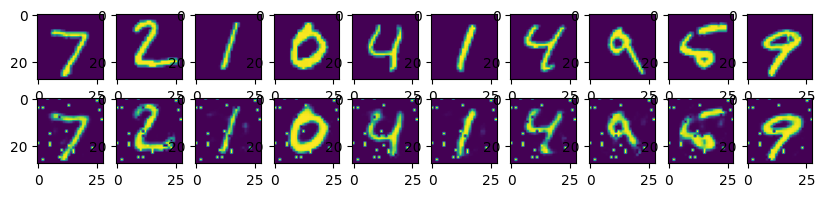

In [8]:
# 테스트 데이터로 Reconstruction을 수행합니다.
reconstructed_result = AutoEncoder_model(x_test[:examples_to_show])
# 원본 MNIST 데이터와 Reconstruction 결과를 비교합니다.
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
  a[0][i].imshow(np.reshape(x_test[i], (28, 28)))
  a[1][i].imshow(np.reshape(reconstructed_result[i], (28, 28)))
f.savefig('reconstructed_mnist_image.png')  # reconstruction 결과를 png로 저장합니다.
f.show()
plt.draw()
#plt.waitforbuttonpress()